In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# ---------------------------------------------------------
# 1. 데이터 로드 (경로 반영)
# ---------------------------------------------------------
file_path = r'C:\Users\USER\Desktop\AI 데이터 분석 4\workspace\project\비만_등급_SMOTE.csv'

try:
    df = pd.read_csv(file_path)
    print(f"(총 데이터: {len(df)}개)")
except FileNotFoundError:
    print("X")
    exit()


(총 데이터: 3240개)


In [3]:
# ---------------------------------------------------------
# 2. 문제(X)와 정답(y) 분리
# ---------------------------------------------------------
# NObeyesdad(비만등급)가 정답, 나머지는 모두 문제(특성)

X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']


In [4]:
# ---------------------------------------------------------
# 3. 학습용 vs 평가용 데이터 나누기
# ---------------------------------------------------------
# train : test = 8 : 2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
# ---------------------------------------------------------
# 4. 랜덤 포레스트 모델 학습
# ---------------------------------------------------------

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("학습 완료")


학습 완료


In [6]:
# ---------------------------------------------------------
# 5. 최종 성적표 (정확도 평가)
# ---------------------------------------------------------
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n 모델 정확도: {accuracy*100:.2f}%")
print("-" * 60)
# 등급별 상세 점수 (0:저체중 ~ 4:고도비만)
print(classification_report(y_test, y_pred, target_names=['저체중', '정상', '과체중', '비만', '고도비만']))



 모델 정확도: 91.98%
------------------------------------------------------------
              precision    recall  f1-score   support

         저체중       0.97      0.94      0.95       130
          정상       0.81      0.91      0.86       129
         과체중       0.92      0.83      0.87       130
          비만       0.92      0.92      0.92       130
        고도비만       1.00      1.00      1.00       129

    accuracy                           0.92       648
   macro avg       0.92      0.92      0.92       648
weighted avg       0.92      0.92      0.92       648




 비만 원인 TOP 5 변수:
FCVC    0.154012
Age     0.144609
NCP     0.099958
TUE     0.089277
CH2O    0.081933
dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_5224\2475338149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp.values, y=feature_imp.index, palette='viridis')


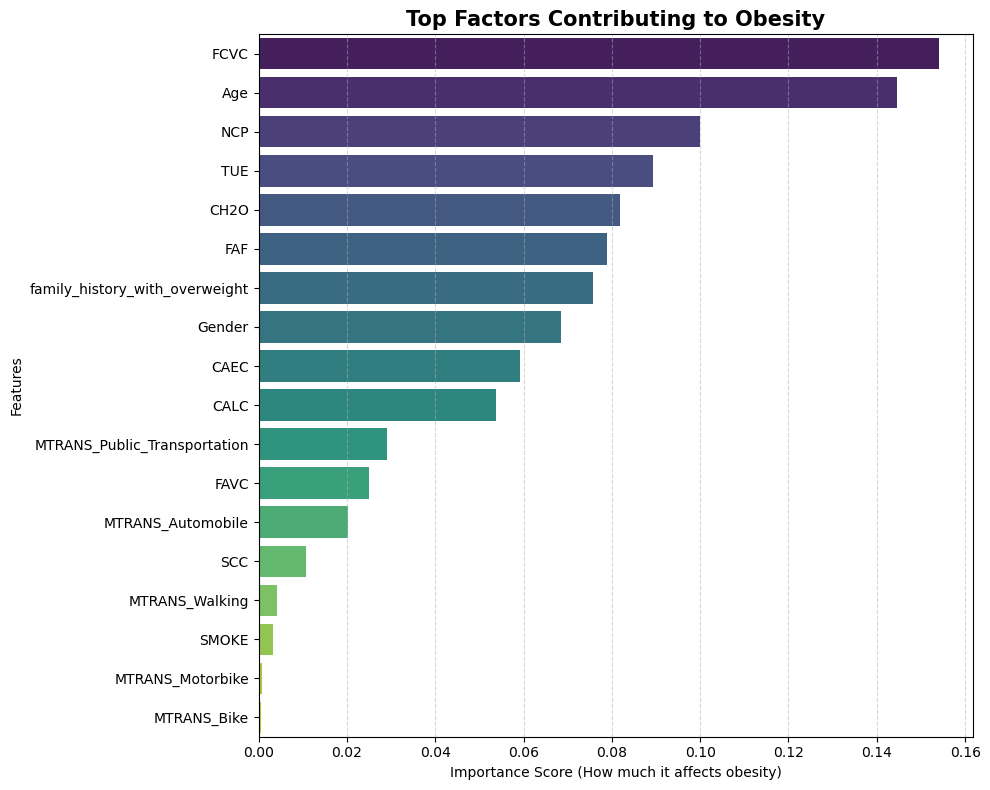

In [7]:
# ---------------------------------------------------------
# 6. [핵심] 비만 원인 분석 (Feature Importance)
# ---------------------------------------------------------
# 모델이 판단한 '중요한 변수' 점수 추출
importances = rf_model.feature_importances_
feature_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("\n 비만 원인 TOP 5 변수:")
print(feature_imp.head(5))

# 그래프 그리기 (VS Code 팝업창용)
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp.values, y=feature_imp.index, palette='viridis')

plt.title('Top Factors Contributing to Obesity', fontsize=15, fontweight='bold')
plt.xlabel('Importance Score (How much it affects obesity)')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [8]:
import joblib

# 모델을 'obesity_model.pkl'이라는 파일로 저장
joblib.dump(rf_model, 'obesity_model.pkl') 
print("모델 저장 완료. 'obesity_model.pkl' 파일이 생성되었습니다.")

모델 저장 완료. 'obesity_model.pkl' 파일이 생성되었습니다.


C:\Users\USER\AppData\Local\Temp\ipykernel_5224\1619071300.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=col, data=df, palette='Set3')
C:\Users\USER\AppData\Local\Temp\ipykernel_5224\1619071300.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=col, data=df, palette='Set3')
C:\Users\USER\AppData\Local\Temp\ipykernel_5224\1619071300.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=col, data=df, palette='Set3')
C:\Users\USER\AppData\Local\Temp\ipykernel_5224\1619071300.py:29: F

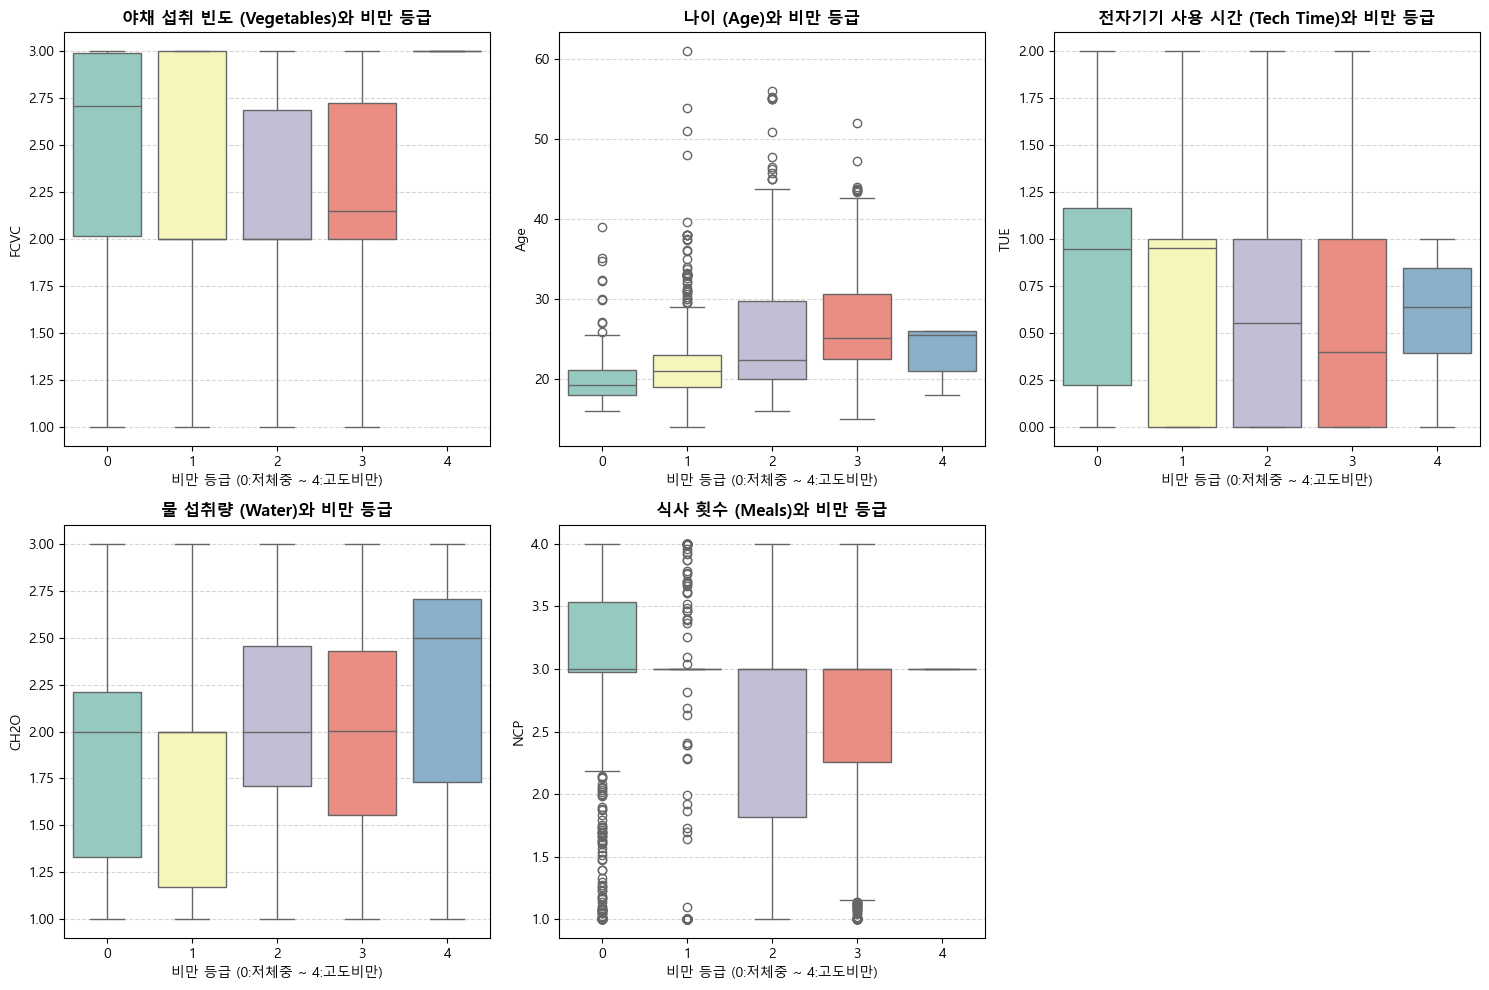

In [9]:
# EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('비만_등급_SMOTE.csv')

# 한글 폰트 설정 (깨짐 방지) - Windows 기준
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 분석할 중요 변수들 (모델 결과에 따라 수정 가능)
top_features = ['FCVC', 'Age', 'TUE', 'CH2O', 'NCP']
titles = {
    'FCVC': '야채 섭취 빈도 (Vegetables)',
    'Age': '나이 (Age)',
    'TUE': '전자기기 사용 시간 (Tech Time)',
    'CH2O': '물 섭취량 (Water)',
    'NCP': '식사 횟수 (Meals)'
}

# 5개 변수에 대한 박스플롯 그리기
plt.figure(figsize=(15, 10))

for i, col in enumerate(top_features):
    plt.subplot(2, 3, i+1) # 2줄 3칸으로 배치
    sns.boxplot(x='NObeyesdad', y=col, data=df, palette='Set3')
    
    plt.title(f'{titles[col]}와 비만 등급', fontsize=12, fontweight='bold')
    plt.xlabel('비만 등급 (0:저체중 ~ 4:고도비만)')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()